In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Aaditya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data = pd.read_csv('C:/Users/Aaditya/Desktop/Studyagain/Machine-Learning-with-Python-master/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

In [7]:
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
bloodpres = tf.feature_column.numeric_column('BloodPressure')
skinthick = tf.feature_column.numeric_column('SkinThickness')
Insulin = tf.feature_column.numeric_column('Insulin')
Bmi = tf.feature_column.numeric_column('BMI')
diabetesped = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

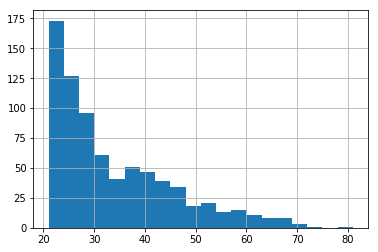

In [11]:
data['Age'].hist(bins = 20)

In [12]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70,80])

In [13]:
feat_cols = [num_preg, glucose, bloodpres, skinthick, Insulin, Bmi, diabetesped, age]

In [14]:
x_data = data.drop('Outcome', axis = 1)

In [15]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [16]:
labels = data['Outcome']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train,
                                                batch_size = 10, num_epochs = 1000,
                                                shuffle = True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Aaditya\\AppData\\Local\\Temp\\tmpc1du44lg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000296A891C470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Aaditya\AppData\Local\Temp\tmpc1du44lg\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 257.169
INFO:tensorflow:loss = 5.5978, step = 101 (0.380 sec)
INFO:tensorflow:global_step/sec: 440.332
INFO:tensorflow:loss = 6.4675083, step = 201 (0.225 sec)
INFO:tensorflow:global_step/sec: 420.403
INFO:tensorflow:loss = 6.420209, step = 301 (0.239 sec)
INFO:tensorflow:global_step/sec: 411.758
INFO:tensorflow:loss = 4.6259537, step = 401 (0.245 sec)
INFO:tensorflow:global_step/sec: 422.187
INFO:tensorflow:loss = 6.2627797, step = 501 (0.236 sec)
INFO:tensorflow:global_step/sec: 406.735
INFO:tensorflow:loss = 5.704399, step = 601 (0.244 sec)
INFO:tensorflow:global_step/sec:

In [25]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test,
                                                batch_size = 10, num_epochs = 10,
                                                shuffle = False)

In [26]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-27-12:59:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Aaditya\AppData\Local\Temp\tmpc1du44lg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-27-12:59:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7186147, accuracy_baseline = 0.64935064, auc = 0.7760494, auc_precision_recall = 0.63401335, average_loss = 0.5753509, global_step = 1000, label/mean = 0.35064936, loss = 5.753509, precision = 0.7105263, prediction/mean = 0.3768395, recall = 0.33333334
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Aaditya\AppData\Local\Temp\tmpc1du44lg\model.ckpt-1000


In [27]:
result

{'accuracy': 0.7186147,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7760494,
 'auc_precision_recall': 0.63401335,
 'average_loss': 0.5753509,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.753509,
 'precision': 0.7105263,
 'prediction/mean': 0.3768395,
 'recall': 0.33333334}

In [46]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y= y_test,
                                                     batch_size = 10,
                                                     num_epochs = 10,
                                                     shuffle = False)

In [47]:
predictions = model.predict(pred_input_func)

In [48]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Aaditya\AppData\Local\Temp\tmpc1du44lg\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [49]:
my_pred

[{'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.338709], dtype=float32),
  'logits': array([-0.6690527], dtype=float32),
  'probabilities': array([0.661291, 0.338709], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.47402987], dtype=float32),
  'logits': array([-0.1039741], dtype=float32),
  'probabilities': array([0.5259701 , 0.47402984], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.33986047], dtype=float32),
  'logits': array([-0.6639161], dtype=float32),
  'probabilities': array([0.6601395 , 0.33986044], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.32929665], dtype=float32),
  'logits': array([-0.71136796], dtype=float32),
  'probabilities': array([0.6707034 , 0.32929665], dtype=float32)},
 {'class_ids'

In [ ]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feat_cols, n_classes = 2)

In [50]:
dnn_model.train(input_fn = input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Aaditya\AppData\Local\Temp\tmp596j1ct0\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Aaditya\AppData\Local\Temp\tmp596j1ct0\model.ckpt.
INFO:tensorflow:loss = 4.4433713, step = 1001
INFO:tensorflow:global_step/sec: 280.213
INFO:tensorflow:loss = 5.9321623, step = 1101 (0.362 sec)
INFO:tensorflow:global_step/sec: 239.895
INFO:tensorflow:loss = 7.0246587, step = 1201 (0.415 sec)
INFO:tensorflow:global_step/sec: 377.496
INFO:tensorflow:loss = 5.6551895, step = 1301 (0.264 sec)
INFO:tensorflow:global_step/sec: 374.668
INFO:tensorflow:loss = 5.7092333, step = 1401 (0.271 sec)
INFO:tensorflow:global_step/sec: 384.755
INFO:tensorflow:loss = 6.0868545, step = 1501 (0.257 sec)
INFO:te

In [51]:
dnn_model.evaluate(input_fn = eval_input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-27-13:17:59
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Aaditya\AppData\Local\Temp\tmp596j1ct0\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Finished evaluation at 2018-08-27-13:18:01
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.6450216, accuracy_baseline = 0.64935064, auc = 0.7261317, auc_precision_recall = 0.49399245, average_loss = 0.5841542, global_step = 2000, label/mean = 0.35064936, loss = 5.8415422, precision = 0.47368422, prediction/mean = 0.32752413, recall = 0.11111111
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Aaditya\AppData\Local\Temp\tmp596j1ct0\model.ckpt-2000


{'accuracy': 0.6450216,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7261317,
 'auc_precision_recall': 0.49399245,
 'average_loss': 0.5841542,
 'global_step': 2000,
 'label/mean': 0.35064936,
 'loss': 5.8415422,
 'precision': 0.47368422,
 'prediction/mean': 0.32752413,
 'recall': 0.11111111}